<a href="https://colab.research.google.com/github/KR-0822/CV_practice/blob/main/kaggle_tomato_dataset_inception_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


In [3]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  error: subprocess-exited-with-error
  
  × Running setup.py install for tensorflow-gpu did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Running setup.py install for tensorflow-gpu ... error
error: legacy-install-failure

× Encountered error while trying to install package.
╰─> tensorflow-gpu

note: This is an issue with the package mentioned above, not pip.
hint: See above for outpu

In [4]:
!nvidia-smi

Thu Mar 16 05:42:30 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P0    28W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
import tensorflow as tf
tf.__version__

'2.11.0'

In [6]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt


In [7]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/gdrive/MyDrive/Dataset/tomato/train'
valid_path = '/content/gdrive/MyDrive/Dataset/tomato/test'


In [8]:
# Import the inception V3 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


87910968/87910968 [==============================] - 0s 0us/step


In [9]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False


In [10]:
  # useful for getting number of output classes
folders = glob('/content/gdrive/MyDrive/Dataset/tomato/train/*')


In [11]:
folders

['/content/gdrive/MyDrive/Dataset/tomato/train/Tomato___Tomato_mosaic_virus',
 '/content/gdrive/MyDrive/Dataset/tomato/train/Tomato___Target_Spot',
 '/content/gdrive/MyDrive/Dataset/tomato/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/gdrive/MyDrive/Dataset/tomato/train/Tomato___Septoria_leaf_spot',
 '/content/gdrive/MyDrive/Dataset/tomato/train/Tomato___Leaf_Mold',
 '/content/gdrive/MyDrive/Dataset/tomato/train/Tomato___Late_blight',
 '/content/gdrive/MyDrive/Dataset/tomato/train/Tomato___healthy',
 '/content/gdrive/MyDrive/Dataset/tomato/train/Tomato___Early_blight',
 '/content/gdrive/MyDrive/Dataset/tomato/train/Tomato___Bacterial_spot',
 '/content/gdrive/MyDrive/Dataset/tomato/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus']

In [6]:
!git clone https://github.com/WongKinYiu/yolov7.git

Cloning into 'yolov7'...
remote: Enumerating objects: 1130, done.
remote: Total 1130 (delta 0), reused 0 (delta 0), pack-reused 1130
Receiving objects: 100% (1130/1130), 69.93 MiB | 16.49 MiB/s, done.
Resolving deltas: 100% (523/523), done.
Updating files: 100% (104/104), done.


In [12]:
# our layers - you can add more if you want
x = Flatten()(inception.output)


In [13]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)


In [15]:
model.summary()
#dense (Dense)                  (None, 10)           train이 10 layer

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [16]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [17]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [19]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/Dataset/tomato/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 2831 images belonging to 10 classes.


In [20]:
test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/Dataset/tomato/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 100 images belonging to 10 classes.


In [21]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


<ipython-input-21-04ffb29a66a7>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
89/89 [==============================] - 442s 5s/step - loss: 0.9241 - accuracy: 0.8343 - val_loss: 3.9412e-04 - val_accuracy: 1.0000
Epoch 2/10
89/89 [==============================] - 41s 465ms/step - loss: 0.3320 - accuracy: 0.9318 - val_loss: 0.1080 - val_accuracy: 0.9600
Epoch 3/10
89/89 [==============================] - 41s 463ms/step - loss: 0.5179 - accuracy: 0.9170 - val_loss: 0.0726 - val_accuracy: 0.9800
Epoch 4/10
89/89 [==============================] - 41s 457ms/step - loss: 0.3907 - accuracy: 0.9343 - val_loss: 0.4574 - val_accuracy: 0.9500
Epoch 5/10
89/89 [==============================] - 41s 460ms/step - loss: 0.2853 - accuracy: 0.9520 - val_loss: 0.1261 - val_accuracy: 0.9700
Epoch 6/10
89/89 [==============================] - 41s 459ms/step - loss: 0.2557 - accuracy: 0.9611 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 7/10
89/89 [==============================] - 41s 456ms/step - loss: 0.1976 - accuracy: 0.9608 - val_loss: 0.4249 - val_accuracy: 0.89

NameError: ignored

In [23]:
import matplotlib.pyplot as plt


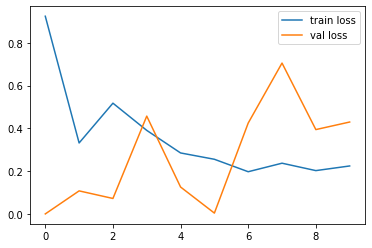

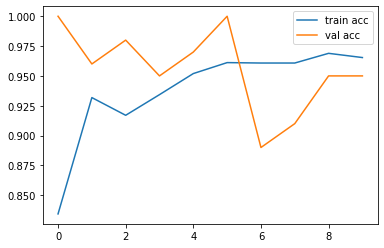

<Figure size 432x288 with 0 Axes>

In [24]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [25]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')


In [26]:
y_pred = model.predict(test_set)


4/4 [==============================] - 2s 127ms/step


In [27]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)


In [31]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
y_pred


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [41]:
test_set[]

SyntaxError: ignored